## Data Understanding

In [8]:
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

In [3]:
df = pd.read_csv("../dataset/train.csv")

In [4]:
df.head()

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.5250,1.1750,0.3750,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.1000,0.8250,0.2750,10.418441,4.521745,2.324659,3.401940,8
2,2,M,1.3875,1.1125,0.3750,24.777463,11.339800,5.556502,6.662133,9
3,3,F,1.7000,1.4125,0.5000,50.660556,20.354941,10.991839,14.996885,11
4,4,I,1.2500,1.0125,0.3375,23.289114,11.977664,4.507570,5.953395,8


In [5]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Weight            0
Shucked Weight    0
Viscera Weight    0
Shell Weight      0
Age               0
dtype: int64

In [25]:
df.shape

(74051, 10)

### What is the distribution of the target variable (Age), and does it show skewness or outliers?

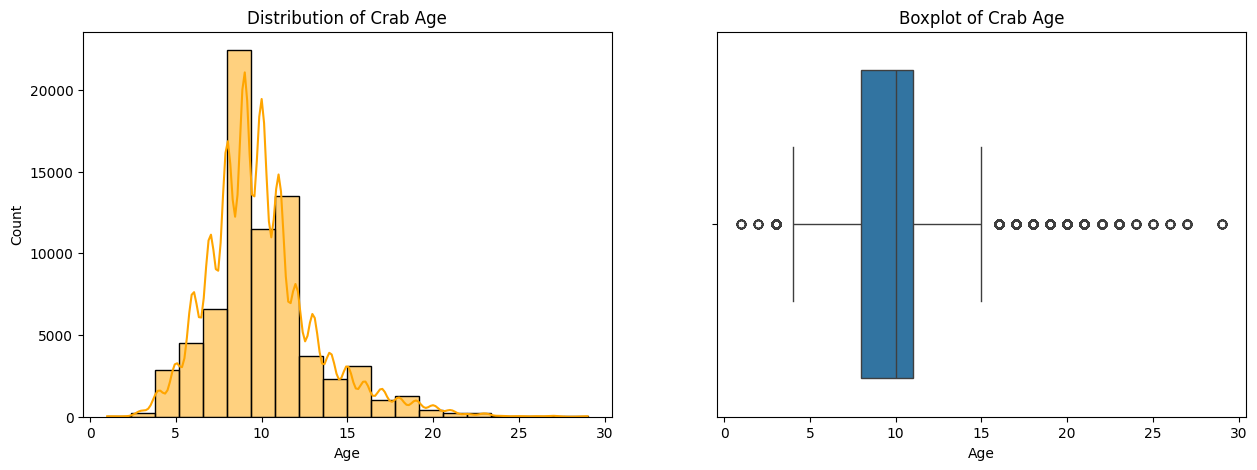

In [13]:
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=20, color='orange')
plt.title('Distribution of Crab Age')

plt.subplot(1, 2, 2)
sns.boxplot(x=df['Age'])
plt.title('Boxplot of Crab Age')

plt.show()

> The target variable Age ranges from 1 to 29!  
The histogram shows a slightly right‑skewed distribution, with most crabs concentrated between 8 and 12 years!   
The boxplot indicates the presence of outliers at the upper end of the age range!  

### Are there any extreme outliers in numerical features that could disproportionately affect regression models

In [18]:
exclude = ['id', 'Age']
num_cols = [col for col in df.select_dtypes(include=['float64', 'int64']).columns 
            if col not in exclude]

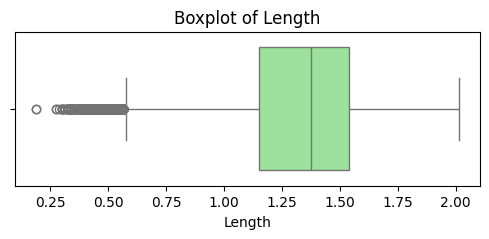

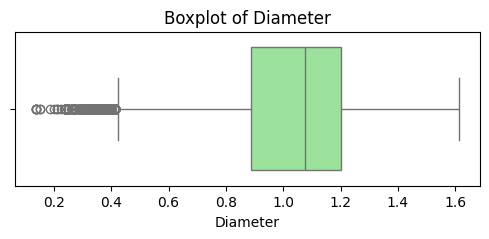

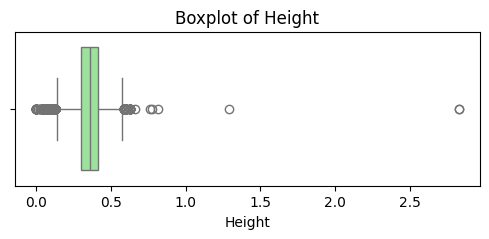

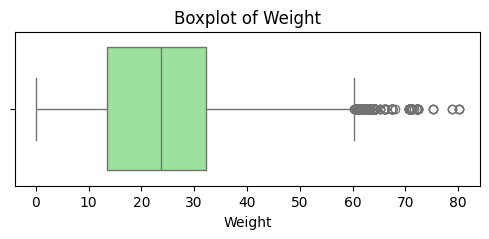

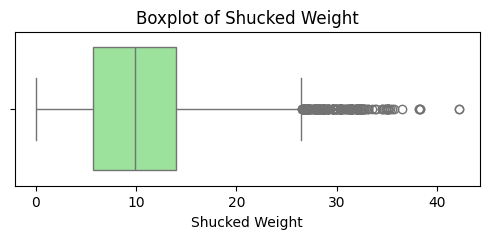

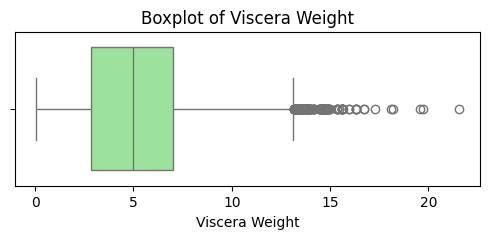

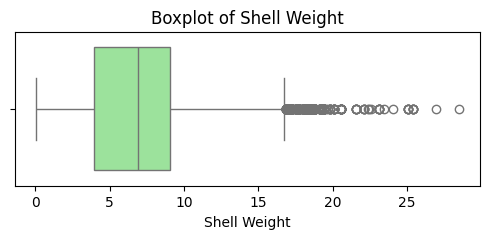

In [23]:
for col in num_cols:
    plt.figure(figsize=(6,2))
    sns.boxplot(x=df[col], color='lightgreen')
    plt.title(f"Boxplot of {col}")
    plt.show()

In [ ]:
from scipy.stats import zscore

z = df[num_cols].apply(zscore)
(z.abs() > 3).sum() #  how many extreme points each feature has.

Length            491
Diameter          256
Height            160
Weight            199
Shucked Weight    269
Viscera Weight    201
Shell Weight      272
dtype: int64

> To identify extreme outliers that may affect regression performance, boxplots were generated for all numerical features!  
All numerical features have outliers and some extreme outliers. Z-Score analysis confirms that all the numerical features have some extreme outliers!  
These outliers may require transformation (e.g., log), capping, or robust regression methods!

### How does Age vary across different values of Sex?

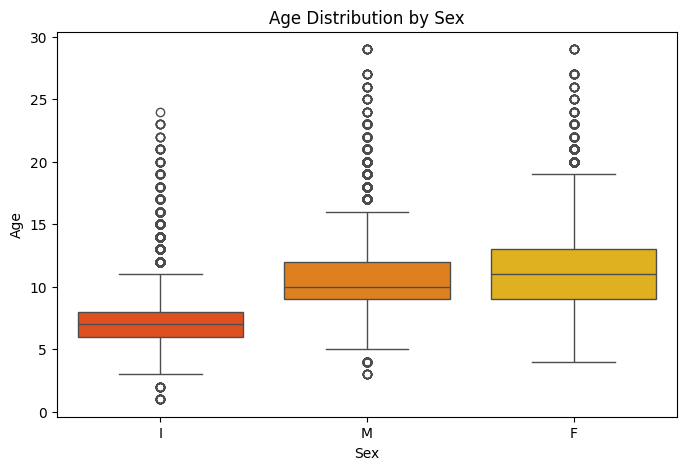

In [30]:
plt.figure(figsize=(8, 5))
sns.boxplot(data=df, x='Sex', y='Age', hue='Sex', palette='autumn')
plt.title('Age Distribution by Sex')
plt.show()

In [31]:
df.groupby('Sex')['Age'].describe()

,count,mean,std,min,25%,50%,75%,max
Sex,,,,,,,,
F,23010.0,11.341547,2.957291,4.0,9.0,11.0,13.0,29.0
I,23957.0,7.599073,2.229675,1.0,6.0,7.0,8.0,24.0
M,27084.0,10.895953,2.882714,3.0,9.0,10.0,12.0,29.0


#### Which group is oldest on average?
1. F (Female): mean ≈ 11.34
2. M (Male): mean ≈ 10.90
3. I (Infant): mean ≈ 7.60
> So the ranking is: F > M >> I

#### Which group is youngest?
> Clearly I, with: min = 1, median = 7, 75% = 8 This group is consistently younger.

#### Which group has the widest spread (variability)?
Look at std:
1. F: 2.97
2. M: 2.88
3. I: 2.23
> So: F ≈ M > I. Females and males have similar variability. Infants are more tightly clustered around younger ages.

#### Which group has the widest range?
Range = max − min  
1. F: 29 − 4 = 25
2. M: 29 − 3 = 26
3. I: 24 − 1 = 23
> So: M has the widest range, but all three are fairly similar.

In [14]:
df.head(2)

,id,Sex,Length,Diameter,Height,Weight,Shucked Weight,Viscera Weight,Shell Weight,Age
0,0,I,1.525,1.175,0.375,28.973189,12.728926,6.647958,8.348928,9
1,1,I,1.100,0.825,0.275,10.418441,4.521745,2.324659,3.401940,8
